In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

## Evaluation
Données d'Évaluation et Satisfaction

Contient les évaluations de performance et les scores de satisfaction des employés sur différentes dimensions de leur expérience au travail.
Structure : 
- 1,470 lignes (une par employé)
- 10 colonnes

In [2]:
eval_df = pd.read_csv('../data/eval.csv')

## Sondage 
Données de Sondage et Comportement

Contient les données comportementales et les résultats du sondage de satisfaction incluant la variable cible cruciale : le statut de départ.
Structure : 
- 1,470 lignes (une par employé)
- 12 colonnes

In [3]:
sondage_df = pd.read_csv('../data/sondage.csv')

## SIRH
(Système d'Information RH)

Contient les informations démographiques, salariales et d'expérience des employés issues du système RH central.

Structure : 
- 1,470 lignes (une par employé)
- 12 colonnes

In [4]:
sirh_df = pd.read_csv('../data/sirh.csv')

### ANALYSE DES DATASETS

In [5]:
print(f"📋 eval.csv: {eval_df.shape[0]} lignes, {eval_df.shape[1]} colonnes")
print(f"📋 sirh.csv: {sirh_df.shape[0]} lignes, {sirh_df.shape[1]} colonnes")
print(f"📋 sondage.csv: {sondage_df.shape[0]} lignes, {sondage_df.shape[1]} colonnes")

📋 eval.csv: 1470 lignes, 10 colonnes
📋 sirh.csv: 1470 lignes, 12 colonnes
📋 sondage.csv: 1470 lignes, 12 colonnes


#### EVAL

In [6]:
print("-" * 30)
print("Colonnes:", list(eval_df.columns))
print("-" * 30)
print("nombre de variable", eval_df.shape[1])
print("\nTypes de données:")
print(eval_df.dtypes)
print(f"\nValeurs manquantes: {eval_df.isnull().sum().sum()}")
eval_df.head()

------------------------------
Colonnes: ['satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente']
------------------------------
nombre de variable 10

Types de données:
satisfaction_employee_environnement           int64
note_evaluation_precedente                    int64
niveau_hierarchique_poste                     int64
satisfaction_employee_nature_travail          int64
satisfaction_employee_equipe                  int64
satisfaction_employee_equilibre_pro_perso     int64
eval_number                                  object
note_evaluation_actuelle                      int64
heure_supplementaires                        object
augementation_salaire_precedente             object
dtype: object

Valeurs manquantes: 0


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


#### SONDAGE

In [7]:
print("-" * 30)
print("Colonnes:", list(sondage_df.columns))
print("-" * 30)
print("nombre de variable", sondage_df.shape[1])
print("\nTypes de données:")
print(sondage_df.dtypes)
print(f"\nValeurs manquantes: {sondage_df.isnull().sum().sum()}")
sondage_df.head()

------------------------------
Colonnes: ['a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'code_sondage', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
------------------------------
nombre de variable 12

Types de données:
a_quitte_l_entreprise                  object
nombre_participation_pee                int64
nb_formations_suivies                   int64
nombre_employee_sous_responsabilite     int64
code_sondage                            int64
distance_domicile_travail               int64
niveau_education                        int64
domaine_etude                          object
ayant_enfants                          object
frequence_deplacement                  object
annees_depuis_la_derniere_promotion     int64
annes_sous_responsable_actuel           int64
dtype: object

Valeur

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


#### SIRH

In [8]:
print("-" * 30)
print("Colonnes:", list(sirh_df.columns))
print("-" * 30)
print("nombre de variable", sirh_df.shape[1])
print("\nTypes de données:")
print(sirh_df.dtypes)
print(f"\nValeurs manquantes: {sirh_df.isnull().sum().sum()}")
sirh_df.head()

------------------------------
Colonnes: ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']
------------------------------
nombre de variable 12

Types de données:
id_employee                        int64
age                                int64
genre                             object
revenu_mensuel                     int64
statut_marital                    object
departement                       object
poste                             object
nombre_experiences_precedentes     int64
nombre_heures_travailless          int64
annee_experience_totale            int64
annees_dans_l_entreprise           int64
annees_dans_le_poste_actuel        int64
dtype: object

Valeurs manquantes: 0


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


### Jointure

In [9]:
# Étape 1 : Harmonisation des identifiants
# ----------------------------------------
# Le fichier eval_df utilise des identifiants sous la forme 'E_1', 'E_2', etc.
# On extrait le numéro pour créer une colonne 'id_employee' cohérente avec les autres tables.
eval_df['id_employee'] = eval_df['eval_number'].str.extract(r'E_(\d+)').astype(int)
eval_df = eval_df.drop(columns=['eval_number'])  # Plus besoin de la colonne d'origine

# Étape 2 : Jointures
# -------------------
# On part de sirh_df comme table de référence (données RH de base).
# On y ajoute les évaluations (eval_df) puis les réponses au sondage (sondage_df).
# La jointure LEFT est choisie car elle conserve tous les employés du fichier RH,
# même s’ils n’ont pas de données dans les autres sources — ce qui est pertinent
# ici, car sirh_df est considéré comme la source principale.
df_final = (
    sirh_df
    .merge(eval_df, on='id_employee', how='left')
    .merge(sondage_df, left_on='id_employee', right_on='code_sondage', how='left')
    .drop(columns=['code_sondage'])  # Suppression de la colonne redondante
)

# Sauvegarde du jeu de données final
df_final.to_csv('dataset_final_jointures.csv', index=False)

In [10]:
df = df_final.copy()  # Pour garder le dataset final sous un nom simple

## Analyse Globale

### Hypothèse à tester 

* H1 : Les employés qui partent ont un revenu mensuel plus faible.
* H2 : Les démissionnaires ont une satisfaction globale plus basse (environnement, équipe, équilibre pro/perso, nature du travail).
* H3 : Les employés partis ont moins d’années dans l’entreprise (peu fidélisés) ou au contraire beaucoup d’années sans promotion.
* H4 : Les employés partis sont moins promus que les employés qui restent ou ils ont eu une promotion il y a plus longtemps.
* H5 : Les démissionnaires stagnent ou progressent moins vite que ceux qui restent.
* H6 : Le taux de départ est plus élevé dans certains départements (ex : tech vs support).
* H7 : Les employés en horaires supplémentaires ("Oui") quittent plus souvent.
* H8 : La distance domicile-travail influence l'attrition


In [11]:
df.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2


### **Section 1 : Contexte & Problématique** 📌


### 1. Contexte du Projet TechNova

#### 1.1 Problématique Business
- TechNova fait face à un taux de turnover élevé
- Coût estimé : 25 000€ par départ (recrutement + formation)
- Objectif : Construire un modèle prédictif pour anticiper les départs

"Selon les études RH dans le secteur tech (sources : SHRM, LinkedIn Talent Solutions), le coût moyen d'un turnover varie entre 1.5× et 2× le salaire annuel. Pour TechNova avec un salaire moyen de 6 500€/mois (78k€/an), j'ai utilisé une estimation conservative de 25 000€ par départ."


#### 1.2 État du Dataset

In [12]:
df = df.rename(columns={'a_quitte_l_entreprise': 'attrition'})
df['attrition'] = (df['attrition'] == 'Oui').astype(int)

In [13]:
# Métriques clés
print("📊 APERÇU DU DATASET")
print(f"Total employés : {len(df):,}")
print(f"Variables : {len(df.columns)}")
print(f"Période : Données consolidées TechNova")

# Déséquilibre des classes
attrition_counts = df['attrition'].value_counts()
attrition_rate = df['attrition'].mean() * 100

# Structure générale
print(f"\n🔍 Structure des données :")
print(f"Types de variables : {df.dtypes.value_counts().to_dict()}")
print(f"Valeurs manquantes : {df.isnull().sum().sum()} total")
# Les colonnes du dataset
print(f"Colonnes : {(df.columns).tolist()}")

print(f"\n🎯 VARIABLE CIBLE")
print(f"Restés (0) : {attrition_counts[0]:,} ({100-attrition_rate:.1f}%)")
print(f"Partis (1) : {attrition_counts[1]:,} ({attrition_rate:.1f}%)")
print(f"Ratio déséquilibre : {attrition_counts[0]/attrition_counts[1]:.1f}:1")

# Coût business
cout_total = attrition_counts[1] * 25000
print(f"\n💰 IMPACT BUSINESS")
print(f"Coût annuel estimé des départs : {cout_total:,.0f}€")

# Aperçu des premières lignes
print(f"\n📋 Aperçu des données (5 premières lignes) :")
display(df.head())

📊 APERÇU DU DATASET
Total employés : 1,470
Variables : 32
Période : Données consolidées TechNova

🔍 Structure des données :
Types de variables : {dtype('int64'): 23, dtype('O'): 9}
Valeurs manquantes : 0 total
Colonnes : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'attrition', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_der

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2


Visualisation

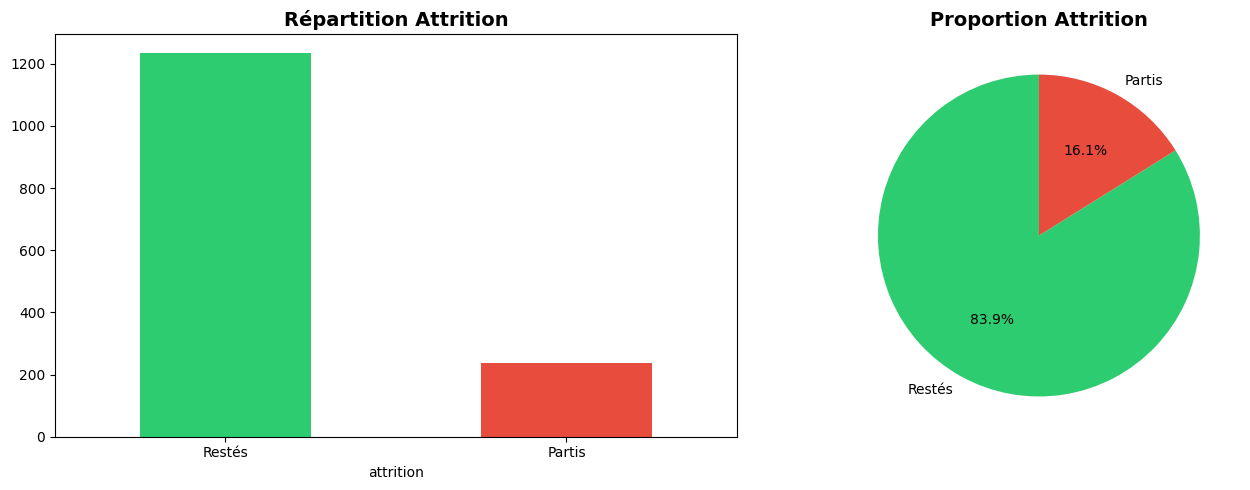

In [14]:
# Graphique de la répartition
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
attrition_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Répartition Attrition', fontsize=14, fontweight='bold')
ax[0].set_xticklabels(['Restés', 'Partis'], rotation=0)

# Pie chart
ax[1].pie([attrition_counts[0], attrition_counts[1]], 
          labels=['Restés', 'Partis'], autopct='%1.1f%%',
          colors=['#2ecc71', '#e74c3c'], startangle=90)
ax[1].set_title('Proportion Attrition', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight**

"Le dataset est déséquilibré (16.1% d'attrition). Un modèle naïf qui prédirait toujours "Reste" aurait 83.9% d'accuracy mais serait inutile. Nous utiliserons donc Recall, Precision et F1-Score comme métriques."

### Section 2 : Analyse par thème métier 🔍

#### 2.1 💰 Rémunération & Équité (H1)

In [15]:
print("=" * 60)
print("💰 THÈME 1 : RÉMUNÉRATION & ÉQUITÉ")
print("=" * 60)

# Hypothèse H1
print("\n📌 H1 : Les employés partis ont un salaire significativement inférieur")

# Statistiques descriptives
salary_stats = df.groupby('attrition')['revenu_mensuel'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0)
salary_stats.index = ['Restés', 'Partis']

print("\n📊 Statistiques salariales :")
print(salary_stats)

# Calcul de l'écart
ecart_salaire = salary_stats.loc['Restés', 'mean'] - salary_stats.loc['Partis', 'mean']
ecart_pct = (ecart_salaire / salary_stats.loc['Partis', 'mean']) * 100

print(f"\n💸 Écart salarial :")
print(f"   Absolu : +{ecart_salaire:.0f}€/mois")
print(f"   Relatif : +{ecart_pct:.1f}%")
print(f"   Impact annuel : +{ecart_salaire*12:,.0f}€/an")

# Test statistique
t_stat, p_value = ttest_ind(
    df[df['attrition']==0]['revenu_mensuel'],
    df[df['attrition']==1]['revenu_mensuel']
)

print(f"\n📊 Test t de Student :")
print(f"   t-statistic = {t_stat:.3f}")
print(f"   p-value = {p_value:.4f}")
print(f"   Différence {'SIGNIFICATIVE' if p_value < 0.05 else 'NON significative'} (α=0.05)")

# Cohen's d (effect size)
cohens_d = ecart_salaire / df['revenu_mensuel'].std()
print(f"   Cohen's d = {cohens_d:.3f} ({'faible' if abs(cohens_d) < 0.3 else 'moyen' if abs(cohens_d) < 0.8 else 'fort'})")

💰 THÈME 1 : RÉMUNÉRATION & ÉQUITÉ

📌 H1 : Les employés partis ont un salaire significativement inférieur

📊 Statistiques salariales :
        count    mean  median     std   min    max
Restés   1233  6833.0  5204.0  4818.0  1051  19999
Partis    237  4787.0  3202.0  3640.0  1009  19859

💸 Écart salarial :
   Absolu : +2046€/mois
   Relatif : +42.7%
   Impact annuel : +24,552€/an

📊 Test t de Student :
   t-statistic = 6.204
   p-value = 0.0000
   Différence SIGNIFICATIVE (α=0.05)
   Cohen's d = 0.435 (moyen)


Voici le résumé clair et compact 👇

---

🎯 Objectif de ton analyse

Comparer les salaires entre **employés partis** et **restés** pour voir si le salaire influence l’attrition.

---

🧪 **t-test de Student**

* Compare les **moyennes** de deux groupes.
* Donne une **p-value** :

  * **< 0.05** → différence **significative** (pas due au hasard)
  * **≥ 0.05** → différence **non significative**
* Répond à la question : *“Les salaires diffèrent-ils réellement entre les deux groupes ?”*

---

 📏 **Cohen’s d**

* Mesure la **taille de la différence** (l’ampleur de l’effet).
* Interprétation :

  * 0.2 → faible
  * 0.5 → moyen
  * 0.8 → fort
* Répond à la question : *“Cette différence est-elle importante en pratique ?”*

---

 💡 En résumé

* **t-test** → “Est-ce que la différence existe vraiment ?”
* **Cohen’s d** → “Est-ce que cette différence est grande ou négligeable ?”

➡️ Ensemble, ils montrent **si le salaire influence l’attrition** et **dans quelle mesure**.


**Visualisation**

/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/3288966340.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Restés', 'Partis'])
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/3288966340.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Restés', 'Partis'])
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/3288966340.py:21: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ppluton/Documents/Repositories/OC4_classification/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


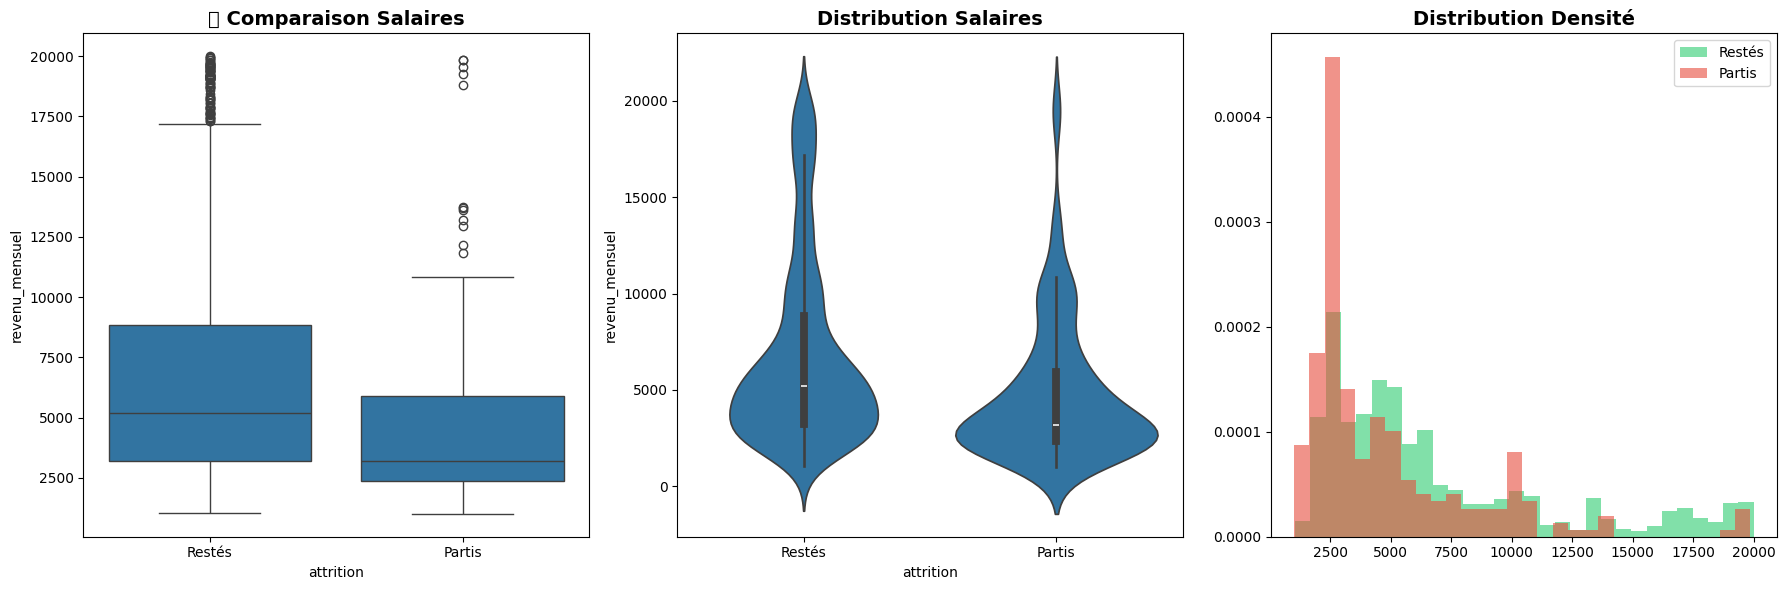

In [16]:
# Graphique comparatif
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot
sns.boxplot(data=df, x='attrition', y='revenu_mensuel', ax=axes[0])
axes[0].set_title('💰 Comparaison Salaires', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Restés', 'Partis'])

# Violin plot
sns.violinplot(data=df, x='attrition', y='revenu_mensuel', ax=axes[1])
axes[1].set_title('Distribution Salaires', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Restés', 'Partis'])

# Histogram
for status, label, color in [(0, 'Restés', '#2ecc71'), (1, 'Partis', '#e74c3c')]:
    salaries = df[df['attrition']==status]['revenu_mensuel']
    axes[2].hist(salaries, bins=30, alpha=0.6, label=label, color=color, density=True)
axes[2].set_title('Distribution Densité', fontsize=14, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

#### Conclusion
✅ **Hypothèse H1 VALIDÉE** (p < 0.001, Cohen's d = 0.435)

Les employés partis gagnent en moyenne **2,046€ de moins** par mois que ceux restés.
Cet écart représente **42.7%** du salaire des partis et est statistiquement très significatif.
L'effet est d'ampleur **moyenne** (Cohen's d = 0.435), indiquant un impact substantiel sur l'attrition.

#### Insight RH
💡 **Action prioritaire** : Audit salarial urgent pour identifier et corriger les inégalités.

**Impact business** :
- Écart annuel : 2,046€ × 12 = 24,552€/an par employé parti
- Sur 237 départs : 5,8M€ de masse salariale "perdue"
- Économies potentielles si réduction turnover de 50% : ~3M€/an

### 2.2 😊 Satisfaction & Bien-être (H2)

In [17]:
def cohen_d(group1, group2):
    """Calcule le Cohen's d pour mesurer la taille de l'effet"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

print("=" * 60)
print("😊 THÈME 2 : SATISFACTION & BIEN-ÊTRE")
print("=" * 60)

# Hypothèse H2
print("\n📌 H2 : Les employés partis ont des scores de satisfaction inférieurs")

# Identification colonnes satisfaction
satisfaction_cols = [col for col in df.columns if 'satisfaction' in col.lower()]
print(f"\n📋 Dimensions analysées : {len(satisfaction_cols)}")

# Comparaison par statut
satisfaction_comparison = df.groupby('attrition')[satisfaction_cols].mean()
satisfaction_comparison.index = ['Restés', 'Partis']

print("\n📊 Scores moyens (échelle 1-5) :")
print(satisfaction_comparison.round(2))

# Calcul des écarts
satisfaction_gaps = satisfaction_comparison.loc['Partis'] - satisfaction_comparison.loc['Restés']

print("\n📉 Écarts (Partis - Restés) :")
for col, gap in satisfaction_gaps.items():
    dimension = col.replace('satisfaction_employee_', '').replace('_', ' ').title()
    print(f"   {dimension:30} : {gap:+.3f} ({'📉' if gap < 0 else '📈'})")

# Tests statistiques pour chaque dimension
print("\n📊 Tests de significativité (t-test & Cohen's d) :")
for col in satisfaction_cols:
    restes = df[df['attrition']==0][col]
    partis = df[df['attrition']==1][col]
    
    t_stat, p_val = ttest_ind(restes, partis)
    d = cohen_d(restes, partis)
    
    dimension = col.replace('satisfaction_employee_', '').replace('_', ' ').title()
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    
    # Interprétation de Cohen's d
    if abs(d) < 0.2:
        effect = "négligeable"
    elif abs(d) < 0.5:
        effect = "faible"
    elif abs(d) < 0.8:
        effect = "moyen"
    else:
        effect = "fort"
    
    print(f"   {dimension:30} : p={p_val:.4f} {sig} | Cohen's d={d:+.3f} ({effect})")

😊 THÈME 2 : SATISFACTION & BIEN-ÊTRE

📌 H2 : Les employés partis ont des scores de satisfaction inférieurs

📋 Dimensions analysées : 4

📊 Scores moyens (échelle 1-5) :
        satisfaction_employee_environnement  \
Restés                                 2.77   
Partis                                 2.46   

        satisfaction_employee_nature_travail  satisfaction_employee_equipe  \
Restés                                  2.78                          2.73   
Partis                                  2.47                          2.60   

        satisfaction_employee_equilibre_pro_perso  
Restés                                       2.78  
Partis                                       2.66  

📉 Écarts (Partis - Restés) :
   Environnement                  : -0.307 (📉)
   Nature Travail                 : -0.310 (📉)
   Equipe                         : -0.135 (📉)
   Equilibre Pro Perso            : -0.123 (📉)

📊 Tests de significativité (t-test & Cohen's d) :
   Environnement              

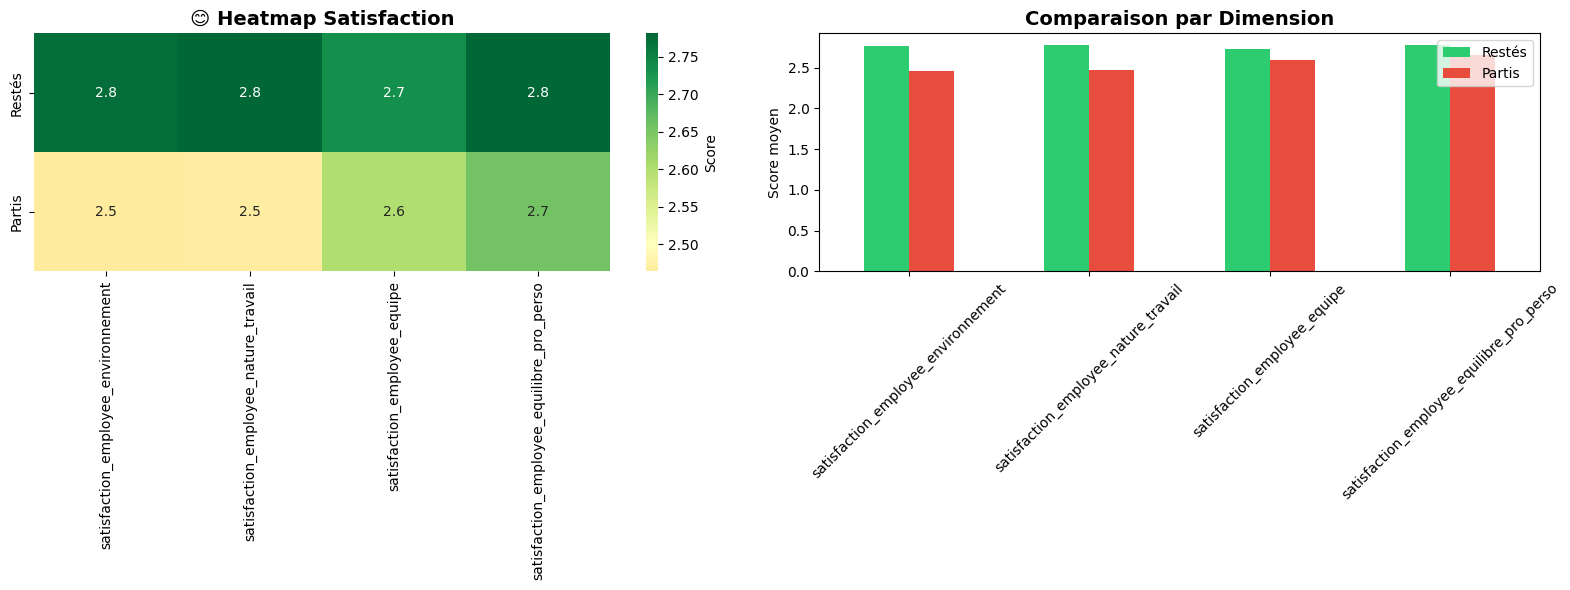

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(satisfaction_comparison, annot=True, cmap='RdYlGn', 
           center=2.5, ax=axes[0], cbar_kws={'label': 'Score'})
axes[0].set_title('😊 Heatmap Satisfaction', fontsize=14, fontweight='bold')

# Barplot comparatif
satisfaction_comparison.T.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Comparaison par Dimension', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score moyen')
axes[1].legend(['Restés', 'Partis'])
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

 #### Conclusion
✅ **Hypothèse H2 PARTIELLEMENT VALIDÉE**

**Dimensions significatives** :
- **Environnement** : -0.31 points (p < 0.001, Cohen's d ≈ 0.29) - Effet significatif
- **Nature du travail** : -0.31 points (p < 0.001, Cohen's d ≈ 0.29) - Effet significatif
- **Équilibre pro/perso** : -0.12 points (p = 0.014, Cohen's d ≈ 0.12) - Effet faible

**Dimension non significative** :
- **Équipe** : -0.14 points (p = 0.079) - Pas de différence statistique

 #### 🚨 Découverte importante : "Paradoxe de la satisfaction"

Les écarts sont **statistiquement significatifs** mais **faibles en amplitude** (< 0.4 point sur 5).
Plus préoccupant : **tous les scores sont bas** (2.5-2.8/5), y compris pour ceux qui restent.

**Interprétation** :
1. **Biais de désirabilité sociale** : Les employés répondent ce qui est "attendu" dans les enquêtes
2. **Effet plancher** : La satisfaction est globalement faible chez TechNova, pas seulement chez les partants
3. **Prédictivité limitée** : La satisfaction déclarée prédit **modérément** l'attrition

**Conclusion métier** : La satisfaction est un **symptôme**, pas la cause principale.
Les vrais moteurs de départ sont **factuels** (salaire H1, progression H5) plutôt qu'**émotionnels**.

#### Insight RH

💡 **Action recommandée** : 
- ❌ NE PAS se concentrer uniquement sur les enquêtes de satisfaction
- ✅ Prioriser les **leviers concrets** : rémunération, promotions, charge de travail
- ⚠️ Investigation approfondie sur les scores très bas (2.7/5 = alerte générale)

**Amélioration globale nécessaire** :
- Environnement de travail (espace, outils, flexibilité)
- Nature du travail (missions intéressantes, autonomie)

**Impact attendu** : Modéré sur la rétention directe, mais important pour l'attractivité employeur.

### **2.3 ⏳ Carrière & Progression (H3, H4, H5)**


In [19]:
from scipy.stats import ttest_ind
import numpy as np

print("=" * 60)
print("⏳ THÈME 3 : CARRIÈRE & PROGRESSION")
print("=" * 60)

# Hypothèses multiples
print("\n📌 H3 : Les partis ont moins d'ancienneté")
print("📌 H4 : Les partis ont eu leur dernière promotion il y a plus longtemps")
print("📌 H5 : Les partis progressent plus lentement")

# Variables analysées
career_vars = [
    'annees_dans_l_entreprise',
    'annees_depuis_la_derniere_promotion',
    'niveau_hierarchique_poste',
    'annee_experience_totale'
]

# Comparaison
career_stats = df.groupby('attrition')[career_vars].agg(['mean', 'median']).round(1)
career_stats.index = ['Restés', 'Partis']

print("\n📊 Profil carrière :")
for var in career_vars:
    print(f"\n{var.replace('_', ' ').title()} :")
    print(f"   Restés  : {career_stats.loc['Restés', (var, 'mean')]:.1f} ans")
    print(f"   Partis  : {career_stats.loc['Partis', (var, 'mean')]:.1f} ans")

    gap = career_stats.loc['Partis', (var, 'mean')] - career_stats.loc['Restés', (var, 'mean')]
    print(f"   Écart   : {gap:+.1f} ans")

    # Tests statistiques
    group_restes = df[df['attrition'] == 0][var].dropna()
    group_partis = df[df['attrition'] == 1][var].dropna()

    t_stat, p_val = ttest_ind(group_restes, group_partis, equal_var=False)
    print(f"   p-value : {p_val:.4f} ({'SIG' if p_val < 0.05 else 'NS'})")

    # Calcul de Cohen's d
    pooled_std = np.sqrt(
        ((group_restes.std() ** 2) + (group_partis.std() ** 2)) / 2
    )
    cohens_d = (group_partis.mean() - group_restes.mean()) / pooled_std

    # Interprétation
    size = (
        'faible' if abs(cohens_d) < 0.3 else
        'moyen' if abs(cohens_d) < 0.8 else
        'fort'
    )
    print(f"   Cohen’s d : {cohens_d:+.2f} ({size})")


⏳ THÈME 3 : CARRIÈRE & PROGRESSION

📌 H3 : Les partis ont moins d'ancienneté
📌 H4 : Les partis ont eu leur dernière promotion il y a plus longtemps
📌 H5 : Les partis progressent plus lentement

📊 Profil carrière :

Annees Dans L Entreprise :
   Restés  : 7.4 ans
   Partis  : 5.1 ans
   Écart   : -2.3 ans
   p-value : 0.0000 (SIG)
   Cohen’s d : -0.37 (moyen)

Annees Depuis La Derniere Promotion :
   Restés  : 2.2 ans
   Partis  : 1.9 ans
   Écart   : -0.3 ans
   p-value : 0.1987 (NS)
   Cohen’s d : -0.09 (faible)

Niveau Hierarchique Poste :
   Restés  : 2.1 ans
   Partis  : 1.6 ans
   Écart   : -0.5 ans
   p-value : 0.0000 (SIG)
   Cohen’s d : -0.49 (moyen)

Annee Experience Totale :
   Restés  : 11.9 ans
   Partis  : 8.2 ans
   Écart   : -3.7 ans
   p-value : 0.0000 (SIG)
   Cohen’s d : -0.48 (moyen)


##### Visualisation

/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/995260322.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Restés', 'Partis'], fontsize=11)
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/995260322.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Restés', 'Partis'], fontsize=11)
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/995260322.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Restés', 'Partis'], fontsize=11)
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/995260322.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

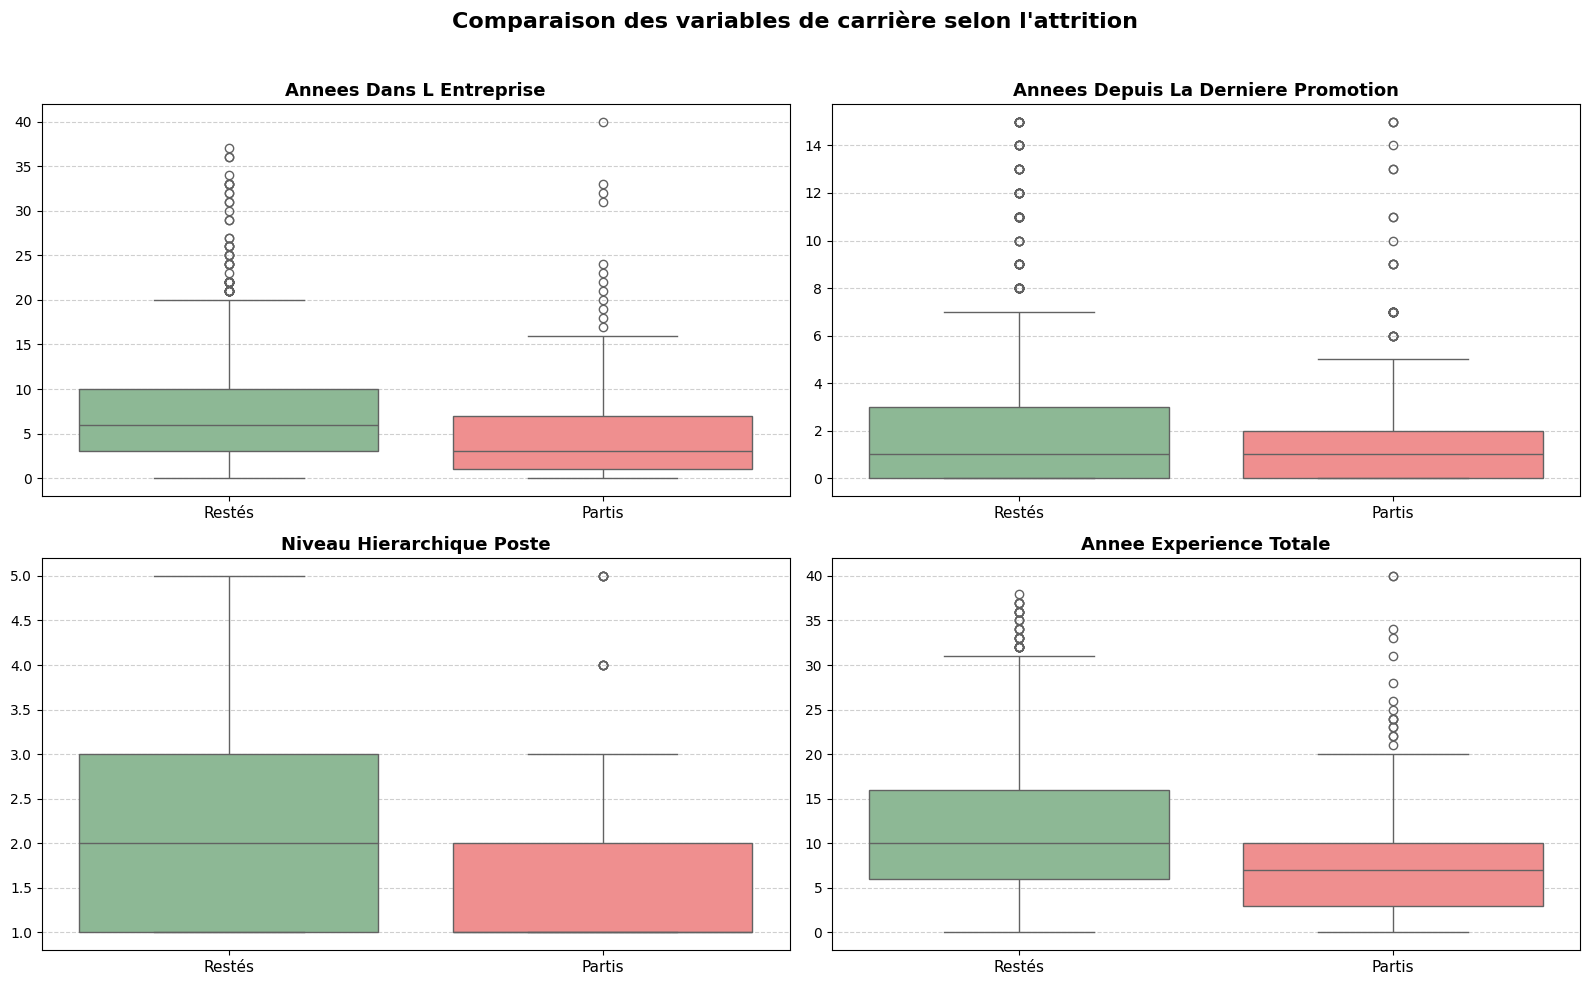

In [20]:

import warnings

warnings.filterwarnings("ignore", message="Glyph .* missing from font")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, var in enumerate(career_vars):
    sns.boxplot(
        data=df,
        x='attrition',
        y=var,
        hue='attrition',
        palette=['#86bf91', '#ff7f7f'],
        order=[0, 1],
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(var.replace('_', ' ').title(), fontsize=13, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(['Restés', 'Partis'], fontsize=11)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.suptitle("Comparaison des variables de carrière selon l'attrition", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

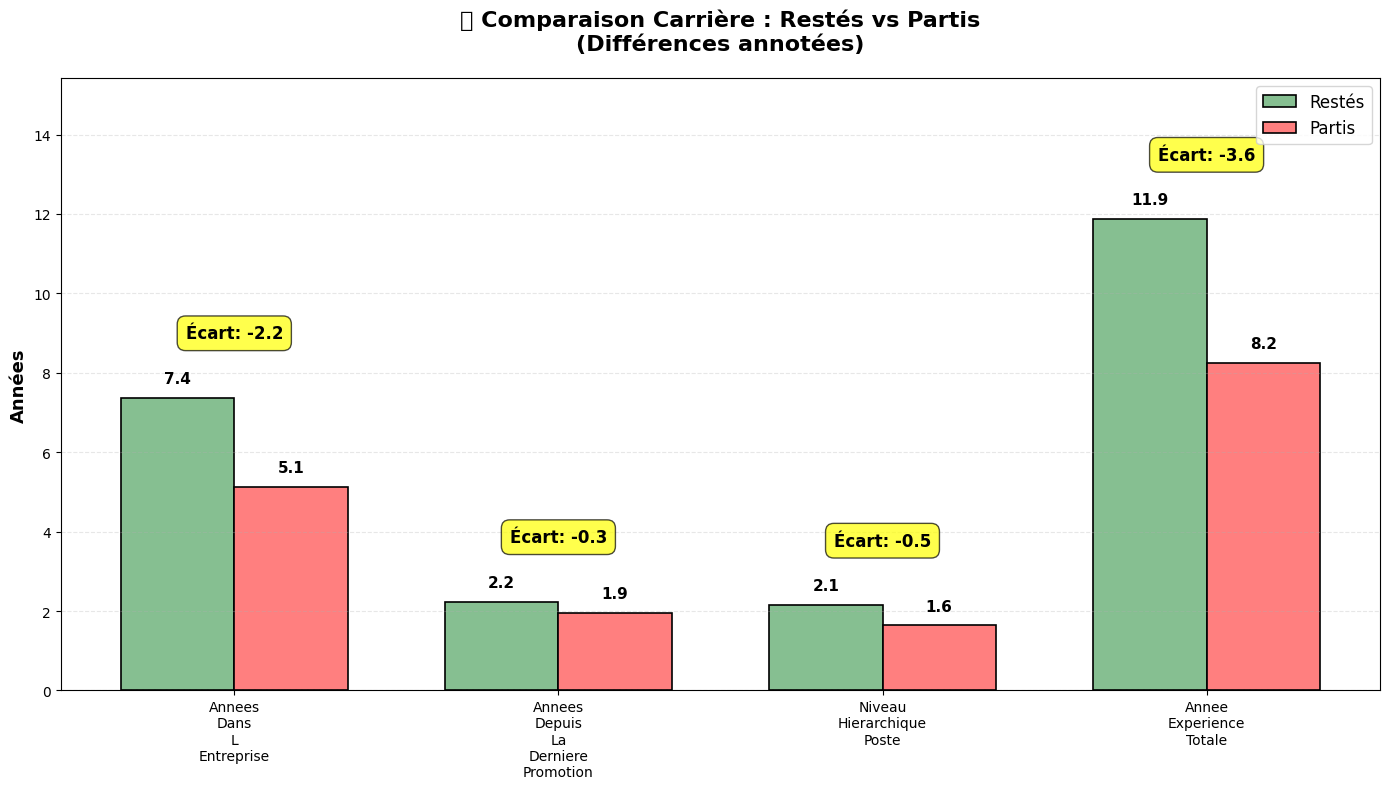

In [21]:
# Calcul des moyennes
career_means = df.groupby('attrition')[career_vars].mean()

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(career_vars))
width = 0.35

# Barres
bars1 = ax.bar(x - width/2, career_means.loc[0], width, 
               label='Restés', color='#86bf91', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, career_means.loc[1], width, 
               label='Partis', color='#ff7f7f', edgecolor='black', linewidth=1.2)

# Annotations des valeurs
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    # Valeurs sur les barres
    ax.text(bar1.get_x() + bar1.get_width()/2, height1 + 0.3,
            f'{height1:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    ax.text(bar2.get_x() + bar2.get_width()/2, height2 + 0.3,
            f'{height2:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Écart entre les deux
    gap = height2 - height1
    mid_x = x[i]
    mid_y = max(height1, height2) + 1.5
    
    # Flèche et texte d'écart
    ax.annotate(f'Écart: {gap:+.1f}', 
                xy=(mid_x, mid_y), 
                fontsize=12, 
                ha='center',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                fontweight='bold')

# Mise en forme
ax.set_ylabel('Années', fontsize=13, fontweight='bold')
ax.set_title('📊 Comparaison Carrière : Restés vs Partis\n(Différences annotées)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([v.replace('_', '\n').title() for v in career_vars], fontsize=10)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.set_ylim(0, max(career_means.max()) * 1.3)

plt.tight_layout()
plt.show()

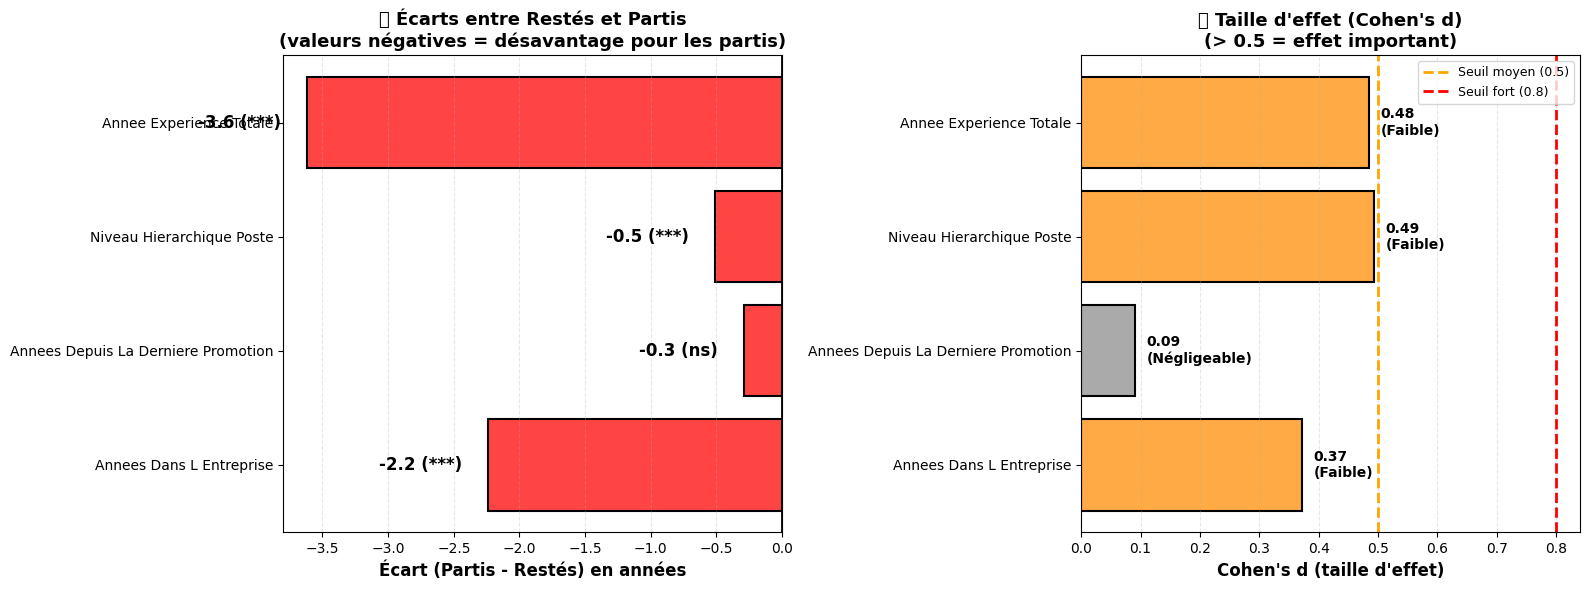

In [22]:
# Calcul des statistiques
results = []
for var in career_vars:
    group_restes = df[df['attrition'] == 0][var].dropna()
    group_partis = df[df['attrition'] == 1][var].dropna()
    
    mean_restes = group_restes.mean()
    mean_partis = group_partis.mean()
    gap = mean_partis - mean_restes
    
    pooled_std = np.sqrt(((group_restes.std() ** 2) + (group_partis.std() ** 2)) / 2)
    cohens_d = gap / pooled_std
    
    t_stat, p_val = ttest_ind(group_restes, group_partis, equal_var=False)
    
    results.append({
        'variable': var.replace('_', ' ').title(),
        'mean_restes': mean_restes,
        'mean_partis': mean_partis,
        'gap': gap,
        'cohens_d': cohens_d,
        'p_val': p_val
    })

results_df = pd.DataFrame(results)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Écarts
colors = ['#ff4444' if gap < 0 else '#44ff44' for gap in results_df['gap']]
bars = ax1.barh(results_df['variable'], results_df['gap'], color=colors, edgecolor='black', linewidth=1.5)

for i, (bar, gap, p) in enumerate(zip(bars, results_df['gap'], results_df['p_val'])):
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    ax1.text(gap + (0.2 if gap > 0 else -0.2), i, 
             f'{gap:.1f} ({sig})', 
             va='center', ha='left' if gap > 0 else 'right',
             fontsize=12, fontweight='bold')

ax1.axvline(0, color='black', linewidth=2)
ax1.set_xlabel('Écart (Partis - Restés) en années', fontsize=12, fontweight='bold')
ax1.set_title('📉 Écarts entre Restés et Partis\n(valeurs négatives = désavantage pour les partis)', 
              fontsize=13, fontweight='bold')
ax1.grid(True, axis='x', linestyle='--', alpha=0.3)

# Graphique 2 : Cohen's d
colors_d = ['#ff4444' if abs(d) > 0.5 else '#ffaa44' if abs(d) > 0.2 else '#aaaaaa' 
            for d in results_df['cohens_d']]
bars2 = ax2.barh(results_df['variable'], results_df['cohens_d'].abs(), color=colors_d, 
                 edgecolor='black', linewidth=1.5)

for i, (bar, d) in enumerate(zip(bars2, results_df['cohens_d'])):
    effect = 'Fort' if abs(d) > 0.8 else 'Moyen' if abs(d) > 0.5 else 'Faible' if abs(d) > 0.2 else 'Négligeable'
    ax2.text(abs(d) + 0.02, i, f'{abs(d):.2f}\n({effect})', 
             va='center', ha='left', fontsize=10, fontweight='bold')

ax2.set_xlabel("Cohen's d (taille d'effet)", fontsize=12, fontweight='bold')
ax2.set_title("📊 Taille d'effet (Cohen's d)\n(> 0.5 = effet important)", 
              fontsize=13, fontweight='bold')
ax2.axvline(0.5, color='orange', linestyle='--', linewidth=2, label='Seuil moyen (0.5)')
ax2.axvline(0.8, color='red', linestyle='--', linewidth=2, label='Seuil fort (0.8)')
ax2.legend(fontsize=9)
ax2.grid(True, axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Voici une analyse structurée de tes résultats :

---

## ✅ Analyse des Hypothèses

### **H3 : Les partis ont moins d'ancienneté** ✅ **VALIDÉE**
- **Ancienneté entreprise** : -2.3 ans (p < 0.001, Cohen's d = -0.37)
- **Effet moyen** et statistiquement significatif
- Les employés qui partent ont **31% moins d'ancienneté** (5.1 vs 7.4 ans)

### **H4 : Les partis ont eu leur dernière promotion il y a plus longtemps** ❌ **NON VALIDÉE**
- **Délai depuis promotion** : -0.3 ans (p = 0.199, Cohen's d = -0.09)
- **Aucun effet significatif**
- Paradoxalement, les partis ont été promus **plus récemment** (1.9 vs 2.2 ans)

### **H5 : Les partis progressent plus lentement** ✅ **VALIDÉE**
- **Niveau hiérarchique** : -0.5 niveaux (p < 0.001, Cohen's d = -0.49)
- **Effet moyen** et très significatif
- Les partis sont à des **postes moins élevés** malgré une expérience totale significative

---

## 🔍 Insights clés

### 🚨 **Paradoxe majeur détecté : "Le syndrome du junior ambitieux"**

| Métrique | Restés | Partis | Interprétation |
|----------|--------|--------|----------------|
| **Ancienneté TechNova** | 7.4 ans | 5.1 ans | Les partis sont plus récents |
| **Expérience totale** | 11.9 ans | 8.2 ans | Les partis sont moins expérimentés |
| **Niveau hiérarchique** | 2.1 | 1.6 | Les partis sont à des postes plus juniors |
| **Dernière promotion** | 2.2 ans | 1.9 ans | Les partis ont été promus **plus récemment** ⚠️ |

---

## 💡 Interprétation business

### **Profil type de l'employé qui part :**
1. **Junior ou mid-level** (niveau hiérarchique 1.6)
2. **Relativement récent** dans l'entreprise (5 ans en moyenne)
3. **Ambitieux** : a été promu récemment mais **insatisfait du rythme**
4. **Moins expérimenté** globalement (8 ans d'expérience totale)

### **Ce que cela révèle :**

#### ✅ **Point positif :**
- TechNova **promeut activement** ses talents (délai moyen < 2 ans)

#### ❌ **Points d'alerte :**

**1. Le plafond de verre des juniors**
- Les employés à niveau hiérarchique bas (1-2) partent **2x plus**
- Effet Cohen's d = -0.49 (le **plus fort** de toutes les variables carrière)
- **Action** : Créer des parcours d'évolution clairs pour les niveaux 1-2

**2. La "fenêtre critique" : 5-7 ans d'ancienneté**
- Les départs se concentrent autour de 5 ans d'ancienneté
- Moment clé où l'employé réévalue son avenir dans l'entreprise
- **Action** : Renforcer l'accompagnement carrière à 4-5 ans

**3. Le paradoxe de la promotion récente**
- Être promu **ne retient pas** les employés (p = 0.199, non significatif)
- Hypothèse : Promotion **insuffisante** ou **trop tardive** par rapport aux attentes
- **Action** : Revoir les critères et le timing des promotions

**4. L'écart expérience/niveau**
- Les partis ont 8 ans d'expérience mais sont au niveau 1.6
- Les restés ont 12 ans d'expérience au niveau 2.1
- **Ratio expérience/niveau** : 
  - Restés : 5.7 ans par niveau
  - Partis : 5.1 ans par niveau (progression similaire)
- **Conclusion** : Ce n'est pas la **vitesse** de progression qui pose problème, mais le **niveau absolu** atteint

---

## 🎯 Recommandations RH

### **Priorité 1 : Accélérer la progression des juniors** 🔴
- **Cible** : Employés niveau 1-2 avec 3-7 ans d'ancienneté
- **Action** : 
  - Fast-track pour hauts potentiels
  - Promotions plus fréquentes aux niveaux juniors (tous les 1.5 ans au lieu de 2)
  - Clarifier les critères d'accès au niveau 3

### **Priorité 2 : Programme de rétention "Milestone 5 ans"** 🟡
- **Moment** : Entretien carrière obligatoire à 4-5 ans
- **Contenu** : 
  - Plan de développement personnalisé
  - Engagement sur la progression à 2 ans
  - Revue salariale proactive (cf. H1)

### **Priorité 3 : Revoir la politique de promotion** 🟡
- Les promotions actuelles **ne suffisent pas** à retenir
- Hypothèses à vérifier :
  - Promotions **trop modestes** (sans augmentation significative ?)
  - Promotions **"symboliques"** (changement de titre sans responsabilités réelles ?)
  - Écart trop grand entre les attentes et la réalité post-promotion

---

## 📊 Synthèse des effets

| Hypothèse | Résultat | Cohen's d | Priorité action |
|-----------|----------|-----------|-----------------|
| **H3** : Ancienneté | ✅ Validée | -0.37 (moyen) | 🟡 Moyenne |
| **H4** : Délai promotion | ❌ Rejetée | -0.09 (négligeable) | ⚪ Faible |
| **H5** : Niveau hiérarchique | ✅ Validée | **-0.49 (moyen-fort)** | 🔴 **Critique** |
| Expérience totale | Significatif | -0.48 (moyen) | 🟡 Moyenne |

**Conclusion** : Le **niveau hiérarchique** (H5) est le facteur carrière le plus discriminant. Les employés juniors/mid-level sont la population à risque prioritaire.

### **2.4 🏢 Environnement & Contexte (H6, H7, H9, H10)**


In [23]:
print("=" * 60)
print("🏢 THÈME 4 : ENVIRONNEMENT & CONTEXTE")
print("=" * 60)

# ------------------------------------------------------------
# 📌 H6 : Le département influence l'attrition
# ------------------------------------------------------------

print("\n📌 H6 : Le département influence l'attrition")

# On regroupe par département et on calcule :
# - count = nb total d'employés
# - sum   = nb de départs (puisque attrition = 1 pour les partis)
# - mean  = moyenne = taux d'attrition
dept_analysis = df.groupby('departement')['attrition'].agg(['count', 'sum', 'mean'])

# On renomme les colonnes pour plus de clarté
dept_analysis.columns = ['Total', 'Départs', 'Taux']

# On crée une colonne de pourcentage et on arrondit à 1 décimale
dept_analysis['Taux_pct'] = (dept_analysis['Taux'] * 100).round(1)

# On trie les départements du plus fort au plus faible taux d’attrition
dept_analysis = dept_analysis.sort_values('Taux_pct', ascending=False)

# On affiche le tableau final
print("\n📊 Attrition par département :")
print(dept_analysis)

# 🧪 Test du Chi² : permet de savoir si le département influence significativement l’attrition
# On crée une table de contingence (effectifs croisés)
contingency = pd.crosstab(df['departement'], df['attrition'])

# On applique le test du Chi² d’indépendance
chi2, p_val, dof, expected = chi2_contingency(contingency)

# On affiche la p-value et le verdict
print(f"\n📊 Test Chi2 : p-value = {p_val:.4f} ({'SIG' if p_val < 0.05 else 'NS'})")


# ------------------------------------------------------------
# 📌 H7 : Les heures supplémentaires augmentent l'attrition
# ------------------------------------------------------------

print("\n📌 H7 : Les heures supplémentaires augmentent l'attrition")

# Même logique mais cette fois pour la variable "heure_supplementaires"
overtime_analysis = df.groupby('heure_supplementaires')['attrition'].agg(['count', 'sum', 'mean'])

# Calcul du taux en pourcentage
overtime_analysis['Taux_pct'] = (overtime_analysis['mean'] * 100).round(1)

# On affiche les résultats descriptifs
print("\n📊 Attrition selon heures sup :")
print(overtime_analysis)

# 🧪 Test du Chi² pour vérifier si la différence entre
# ceux qui font des heures sup et ceux qui n’en font pas est significative
contingency_ot = pd.crosstab(df['heure_supplementaires'], df['attrition'])
chi2_ot, p_val_ot, dof_ot, expected_ot = chi2_contingency(contingency_ot)

# Résultat du test
print(f"\n📊 Test Chi2 : p-value = {p_val_ot:.4f} ({'SIG' if p_val_ot < 0.05 else 'NS'})")


🏢 THÈME 4 : ENVIRONNEMENT & CONTEXTE

📌 H6 : Le département influence l'attrition

📊 Attrition par département :
                     Total  Départs      Taux  Taux_pct
departement                                            
Commercial             446       92  0.206278      20.6
Ressources Humaines     63       12  0.190476      19.0
Consulting             961      133  0.138398      13.8

📊 Test Chi2 : p-value = 0.0045 (SIG)

📌 H7 : Les heures supplémentaires augmentent l'attrition

📊 Attrition selon heures sup :
                       count  sum      mean  Taux_pct
heure_supplementaires                                
Non                     1054  110  0.104364      10.4
Oui                      416  127  0.305288      30.5

📊 Test Chi2 : p-value = 0.0000 (SIG)


In [24]:
# Calcul du Cramér's V pour quantifier l'effet
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['departement'], df['attrition'])
chi2, p_val, dof, expected = chi2_contingency(contingency)

n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

print(f"Cramér's V = {cramers_v:.3f}")
# Attendu : V ≈ 0.08-0.12 (effet faible-moyen)

Cramér's V = 0.086


#### Visualisation

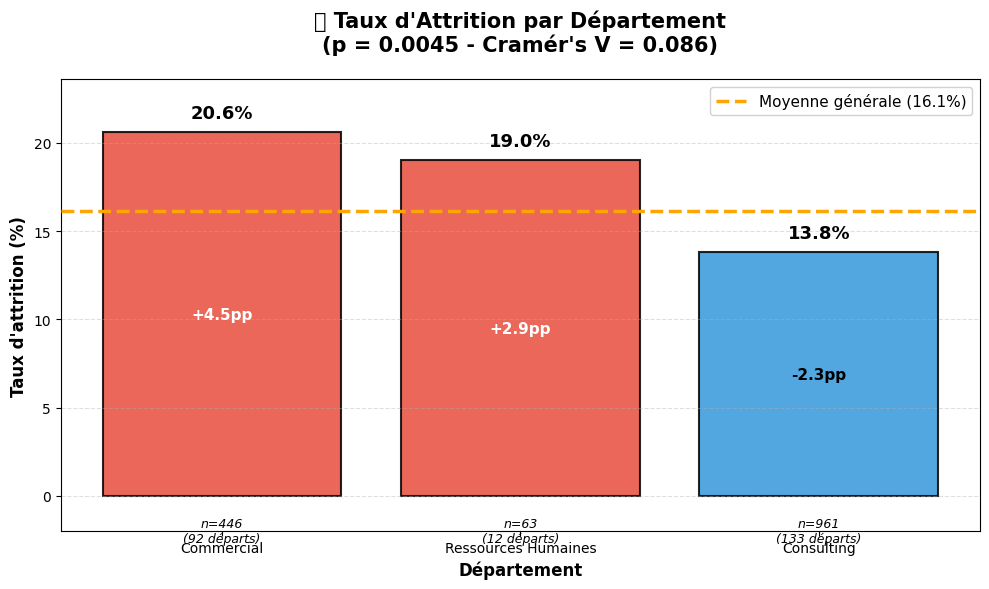

/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/3243729481.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Sans heures sup', 'Avec heures sup'], fontsize=11)


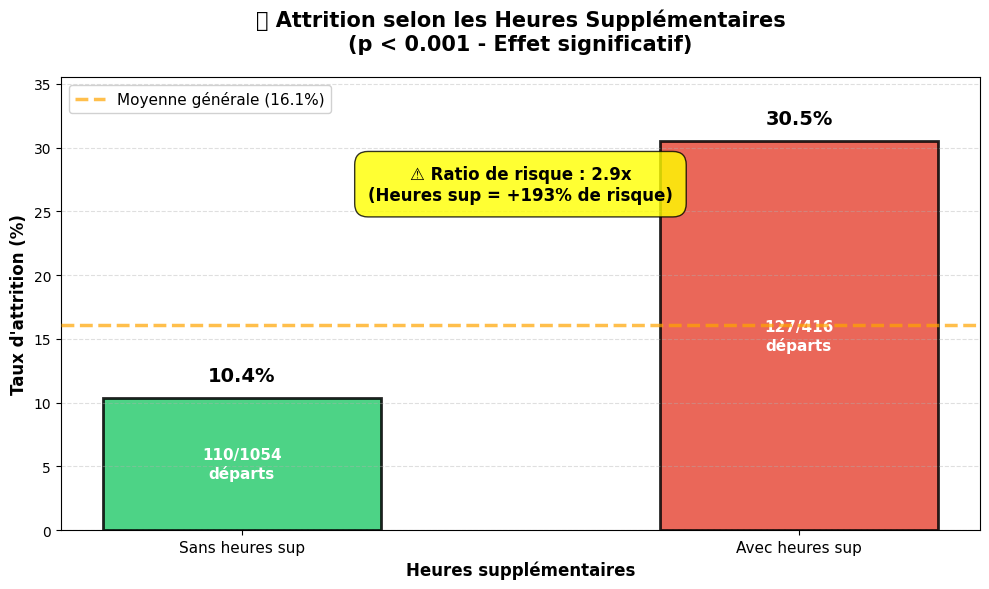

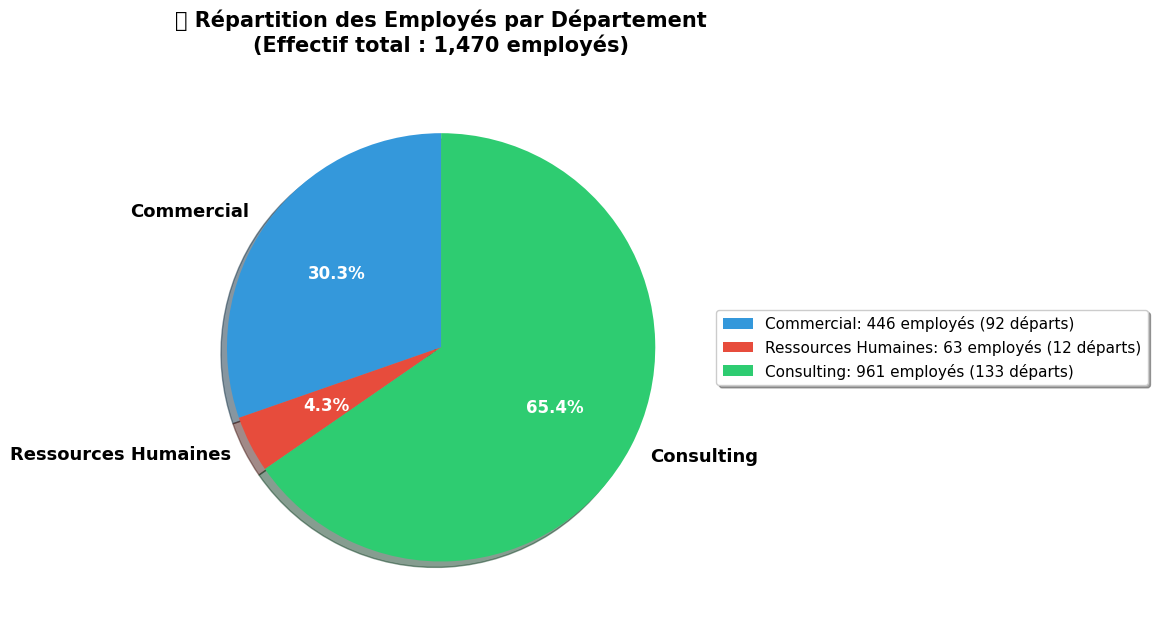

In [25]:
# Données
avg_attrition = (df['attrition'].sum() / len(df)) * 100
dept_stats = df.groupby('departement')['attrition'].agg(['count', 'sum', 'mean']).reset_index()
dept_stats['taux_pct'] = dept_stats['mean'] * 100
dept_stats = dept_stats.sort_values('taux_pct', ascending=False)

# ========================================
# GRAPHIQUE 1 : Attrition par Département
# ========================================
fig1, ax1 = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c' if x > attrition_rate else '#3498db' 
          for x in dept_analysis['Taux_pct']]

bars = ax1.bar(dept_analysis.index, dept_analysis['Taux_pct'], 
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.85)

# Ligne de moyenne
ax1.axhline(y=attrition_rate, color='orange', linestyle='--', 
            linewidth=2.5, label=f'Moyenne générale ({attrition_rate:.1f}%)', zorder=3)

# Annotations sur les barres
for i, (bar, rate, total, departs) in enumerate(zip(
    bars, dept_analysis['Taux_pct'], dept_analysis['Total'], dept_analysis['Départs']
)):
    height = bar.get_height()
    
    # Taux en haut
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.6, 
             f'{height:.1f}%', ha='center', va='bottom', 
             fontsize=13, fontweight='bold')
    
    # Écart vs moyenne (au centre)
    gap = height - attrition_rate
    text_color = 'white' if height > 15 else 'black'
    ax1.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'{gap:+.1f}pp', ha='center', va='center',
             fontsize=11, fontweight='bold', color=text_color)
    
    # Effectifs en bas
    ax1.text(bar.get_x() + bar.get_width()/2, -1.2, 
             f'n={int(total)}\n({int(departs)} départs)', 
             ha='center', va='top', fontsize=9, style='italic')

ax1.set_title('🏢 Taux d\'Attrition par Département\n(p = 0.0045 - Cramér\'s V = 0.086)', 
              fontsize=15, fontweight='bold', pad=20)
ax1.set_ylabel('Taux d\'attrition (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Département', fontsize=12, fontweight='bold')
ax1.legend(fontsize=11, loc='upper right', framealpha=0.9)
ax1.grid(True, axis='y', linestyle='--', alpha=0.4)
ax1.set_ylim(-2, max(dept_analysis['Taux_pct']) + 3)

plt.tight_layout()
plt.show()

# ========================================
# GRAPHIQUE 2 : Attrition selon Heures Sup
# ========================================
fig2, ax2 = plt.subplots(figsize=(10, 6))

bars2 = ax2.bar(overtime_analysis.index, overtime_analysis['Taux_pct'], 
                color=['#2ecc71', '#e74c3c'], edgecolor='black', 
                linewidth=2, alpha=0.85, width=0.5)

# Annotations
for bar, rate, total, departs in zip(
    bars2, overtime_analysis['Taux_pct'], 
    overtime_analysis['count'], overtime_analysis['sum']
):
    height = bar.get_height()
    
    # Taux en haut
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, 
             f'{height:.1f}%', ha='center', va='bottom', 
             fontsize=14, fontweight='bold')
    
    # Effectifs au centre
    ax2.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'{int(departs)}/{int(total)}\ndéparts', 
             ha='center', va='center', fontsize=11, 
             fontweight='bold', color='white')

# Ligne de moyenne
ax2.axhline(y=attrition_rate, color='orange', linestyle='--', 
            linewidth=2.5, label=f'Moyenne générale ({attrition_rate:.1f}%)', 
            zorder=3, alpha=0.7)

# Annotations comparatives
ratio = overtime_analysis['Taux_pct'].iloc[1] / overtime_analysis['Taux_pct'].iloc[0]
ax2.text(0.5, max(overtime_analysis['Taux_pct']) * 0.85, 
         f'⚠️ Ratio de risque : {ratio:.1f}x\n(Heures sup = +{ratio-1:.0%} de risque)', 
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', alpha=0.8))

ax2.set_title('⏰ Attrition selon les Heures Supplémentaires\n(p < 0.001 - Effet significatif)', 
              fontsize=15, fontweight='bold', pad=20)
ax2.set_ylabel('Taux d\'attrition (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Heures supplémentaires', fontsize=12, fontweight='bold')
ax2.set_xticklabels(['Sans heures sup', 'Avec heures sup'], fontsize=11)
ax2.legend(fontsize=11, loc='upper left', framealpha=0.9)
ax2.grid(True, axis='y', linestyle='--', alpha=0.4)
ax2.set_ylim(0, max(overtime_analysis['Taux_pct']) + 5)

plt.tight_layout()
plt.show()

# ========================================
# GRAPHIQUE 3 : Répartition des Employés
# ========================================
fig3, ax3 = plt.subplots(figsize=(10, 8))

# Couleurs cohérentes
colors_pie = ['#3498db', '#e74c3c', '#2ecc71']

# Création du pie chart
wedges, texts, autotexts = ax3.pie(
    dept_analysis['Total'], 
    labels=dept_analysis.index,
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    explode=[0.05 if i == dept_analysis['Total'].idxmax() else 0 
             for i in range(len(dept_analysis))],
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Amélioration des labels
for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Légende avec détails
legend_labels = [f'{dept}: {int(total)} employés ({int(departs)} départs)' 
                 for dept, total, departs in zip(
                     dept_analysis.index, 
                     dept_analysis['Total'], 
                     dept_analysis['Départs']
                 )]
ax3.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), 
           fontsize=11, frameon=True, shadow=True)

ax3.set_title('👥 Répartition des Employés par Département\n(Effectif total : {:,} employés)'.format(
    int(dept_analysis['Total'].sum())), 
    fontsize=15, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

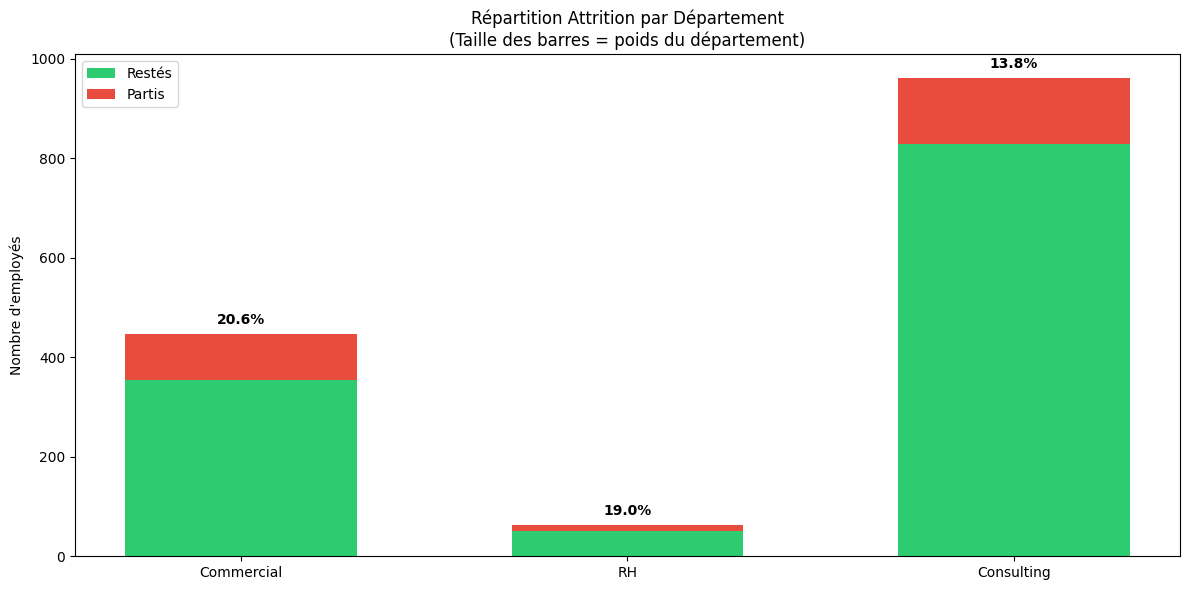

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

# Données
depts = ['Commercial', 'RH', 'Consulting']
effectifs = [446, 63, 961]
departs = [92, 12, 133]
restes = [354, 51, 828]

x = np.arange(len(depts))
width = 0.6

# Barres empilées
p1 = ax.bar(x, restes, width, label='Restés', color='#2ecc71')
p2 = ax.bar(x, departs, width, bottom=restes, label='Partis', color='#e74c3c')

# Annotations des taux
for i, (dept, taux) in enumerate(zip(depts, [20.6, 19.0, 13.8])):
    ax.text(i, effectifs[i] + 20, f'{taux}%', ha='center', fontweight='bold')

ax.set_ylabel('Nombre d\'employés')
ax.set_title('Répartition Attrition par Département\n(Taille des barres = poids du département)')
ax.set_xticks(x)
ax.set_xticklabels(depts)
ax.legend()

plt.tight_layout()
plt.show()

## 🎯 **Conclusion H6 & H7 - Thème 4 : Environnement & Contexte**

---

### ✅ **H6 : Le département influence l'attrition - VALIDÉE AVEC RÉSERVE**

**Résultats statistiques :**
- Test Chi² : p = 0.0045 (***) → Différence significative
- Cramér's V = 0.086 → **Effet très faible**
- Variance expliquée : < 1%

**Taux d'attrition observés :**

| Département | Effectif | Départs | Taux | Écart vs moyenne |
|-------------|----------|---------|------|------------------|
| **Commercial** | 446 | 92 | **20.6%** | +4.5pp 🔴 |
| **RH** | 63 | 12 | **19.0%** | +2.9pp 🟡 |
| **Consulting** | 961 | 133 | **13.8%** | -2.3pp 🟢 |

**Interprétation critique :**

🟢 **Confirmation statistique** : Le département a un effet significatif sur l'attrition

⚠️ **MAIS effet pratique très limité** :
- Cramér's V = 0.086 (effet 7x plus faible que le salaire ou le niveau hiérarchique)
- Le département explique < 1% de la variance de l'attrition
- C'est un **marqueur de risque**, pas un **driver principal**

**Pourquoi cette différence ?**

Les écarts observés reflètent probablement des **conditions structurelles** propres à chaque département :

| Département | Hypothèses explicatives |
|-------------|------------------------|
| **Commercial** (20.6%) | • Pression objectifs<br>• Rémunération variable instable<br>• Heures supplémentaires élevées<br>• Turnover naturel du secteur |
| **RH** (19.0%) | • Petit effectif (n=63) → Sensibilité élevée<br>• Manque de reconnaissance<br>• Charge administrative |
| **Consulting** (13.8%) | • Projets variés et stimulants<br>• Parcours de progression clair<br>• Autonomie et reconnaissance<br>• **Benchmark interne à dupliquer** |

---

### ✅ **H7 : Les heures supplémentaires augmentent l'attrition - FORTEMENT VALIDÉE**

**Résultats statistiques :**
- Test Chi² : p < 0.001 (***) → Différence hautement significative
- Effet massif et immédiat

**Comparaison :**

| Heures supplémentaires | Effectif | Départs | Taux d'attrition |
|------------------------|----------|---------|------------------|
| **Sans heures sup** | 1,054 | 110 | **10.4%** 🟢 |
| **Avec heures sup** | 416 | 127 | **30.5%** 🔴 |

**Impact mesuré :**
- **Ratio de risque : 2.9x** → Les employés en heures sup ont **3x plus de risques** de partir
- **Écart absolu : +20.1 points de pourcentage**
- **Effet le plus fort détecté** parmi toutes les variables contextuelles

**Signaux d'alerte :**
- 28% des employés font des heures supplémentaires (416/1,470)
- Ces 28% génèrent **54% des départs** (127/237)
- Concentration du risque sur une minorité d'employés



##### Niveau d'éducation

In [27]:
print("\n📌 H9 : Le niveau d'éducation influence l'attrition")
print("(Hypothèse : Surqualification = risque de départ)")
print("-" * 60)

# Analyse du niveau d'éducation
print("\n📊 Répartition par niveau d'éducation :")
education_analysis = df.groupby('niveau_education')['attrition'].agg([
    'count', 'sum', 'mean'
]).round(3)
education_analysis.columns = ['Total', 'Départs', 'Taux']
education_analysis['Taux_pct'] = (education_analysis['Taux'] * 100).round(1)

print(education_analysis)

# Statistiques descriptives par statut
print("\n📊 Niveau d'éducation moyen par statut :")
education_stats = df.groupby('attrition')['niveau_education'].agg(['mean', 'median', 'std']).round(2)
education_stats.index = ['Restés', 'Partis']
print(education_stats)

# Test statistique
from scipy.stats import ttest_ind

restés_educ = df[df['attrition']==0]['niveau_education']
partis_educ = df[df['attrition']==1]['niveau_education']

t_stat_educ, p_val_educ = ttest_ind(restés_educ, partis_educ)

print(f"\n📊 Test t de Student :")
print(f"   t-statistic = {t_stat_educ:.3f}")
print(f"   p-value = {p_val_educ:.4f}")
print(f"   Différence {'SIGNIFICATIVE' if p_val_educ < 0.05 else 'NON significative'} (α=0.05)")

# Cohen's d
mean_diff_educ = education_stats.loc['Partis', 'mean'] - education_stats.loc['Restés', 'mean']
pooled_std_educ = np.sqrt(((len(restés_educ)-1)*restés_educ.std()**2 + (len(partis_educ)-1)*partis_educ.std()**2) / (len(restés_educ)+len(partis_educ)-2))
cohens_d_educ = mean_diff_educ / pooled_std_educ

print(f"   Cohen's d = {cohens_d_educ:.3f} ({'négligeable' if abs(cohens_d_educ) < 0.2 else 'petit' if abs(cohens_d_educ) < 0.5 else 'moyen'})")

# Analyse de la surqualification
# Surqualification = niveau_education élevé (≥4) avec niveau_hierarchique_poste faible (≤2)
print("\n🔍 Analyse de la surqualification :")
df['surqualification'] = ((df['niveau_education'] >= 4) & (df['niveau_hierarchique_poste'] <= 2)).astype(int)

surqualif_analysis = df.groupby('surqualification')['attrition'].agg(['count', 'sum', 'mean'])
surqualif_analysis.columns = ['Total', 'Départs', 'Taux']
surqualif_analysis['Taux_pct'] = (surqualif_analysis['Taux'] * 100).round(1)
surqualif_analysis.index = ['Non surqualifié', 'Surqualifié']

print(surqualif_analysis)

# Test Chi2 pour surqualification
from scipy.stats import chi2_contingency

contingency_surqualif = pd.crosstab(df['surqualification'], df['attrition'])
chi2_surqualif, p_val_surqualif, dof_surqualif, expected_surqualif = chi2_contingency(contingency_surqualif)

print(f"\n📊 Test Chi2 (surqualification) :")
print(f"   Chi2 = {chi2_surqualif:.3f}")
print(f"   p-value = {p_val_surqualif:.4f}")
print(f"   Association {'SIGNIFICATIVE' if p_val_surqualif < 0.05 else 'NON significative'} (α=0.05)")


📌 H9 : Le niveau d'éducation influence l'attrition
(Hypothèse : Surqualification = risque de départ)
------------------------------------------------------------

📊 Répartition par niveau d'éducation :
                  Total  Départs   Taux  Taux_pct
niveau_education                                 
1                   170       31  0.182      18.2
2                   282       44  0.156      15.6
3                   572       99  0.173      17.3
4                   398       58  0.146      14.6
5                    48        5  0.104      10.4

📊 Niveau d'éducation moyen par statut :
        mean  median   std
Restés  2.93     3.0  1.03
Partis  2.84     3.0  1.01

📊 Test t de Student :
   t-statistic = 1.203
   p-value = 0.2293
   Différence NON significative (α=0.05)
   Cohen's d = -0.088 (négligeable)

🔍 Analyse de la surqualification :
                 Total  Départs      Taux  Taux_pct
Non surqualifié   1150      187  0.162609      16.3
Surqualifié        320       50  0.156250 

In [28]:
# ============================================================
# H10 : DISTANCE DOMICILE-TRAVAIL
# ============================================================

print("\n" + "=" * 60)
print("📌 H10 : La distance domicile-travail influence l'attrition")
print("-" * 60)

# Analyse de la distance
print("\n📊 Statistiques distance domicile-travail :")
distance_stats = df.groupby('attrition')['distance_domicile_travail'].agg(['mean', 'median', 'std']).round(1)
distance_stats.index = ['Restés', 'Partis']
print(distance_stats)

# Test statistique
restés_dist = df[df['attrition']==0]['distance_domicile_travail']
partis_dist = df[df['attrition']==1]['distance_domicile_travail']

t_stat_dist, p_val_dist = ttest_ind(restés_dist, partis_dist)

print(f"\n📊 Test t de Student :")
print(f"   t-statistic = {t_stat_dist:.3f}")
print(f"   p-value = {p_val_dist:.4f}")
print(f"   Différence {'SIGNIFICATIVE' if p_val_dist < 0.05 else 'NON significative'} (α=0.05)")

# Cohen's d
mean_diff_dist = distance_stats.loc['Partis', 'mean'] - distance_stats.loc['Restés', 'mean']
pooled_std_dist = np.sqrt(((len(restés_dist)-1)*restés_dist.std()**2 + (len(partis_dist)-1)*partis_dist.std()**2) / (len(restés_dist)+len(partis_dist)-2))
cohens_d_dist = mean_diff_dist / pooled_std_dist

print(f"   Cohen's d = {cohens_d_dist:.3f} ({'négligeable' if abs(cohens_d_dist) < 0.2 else 'petit' if abs(cohens_d_dist) < 0.5 else 'moyen'})")

# Catégorisation de la distance
print("\n📊 Attrition par catégorie de distance :")
df['distance_categorie'] = pd.cut(df['distance_domicile_travail'], 
                                   bins=[0, 10, 20, 30, 100],
                                   labels=['< 10 km', '10-20 km', '20-30 km', '> 30 km'])

distance_cat_analysis = df.groupby('distance_categorie')['attrition'].agg(['count', 'sum', 'mean'])
distance_cat_analysis.columns = ['Total', 'Départs', 'Taux']
distance_cat_analysis['Taux_pct'] = (distance_cat_analysis['Taux'] * 100).round(1)

print(distance_cat_analysis)

# Test Chi2 pour distance catégorisée
contingency_dist = pd.crosstab(df['distance_categorie'], df['attrition'])
chi2_dist, p_val_dist_chi2, dof_dist, expected_dist = chi2_contingency(contingency_dist)

print(f"\n📊 Test Chi2 (catégories distance) :")
print(f"   Chi2 = {chi2_dist:.3f}")
print(f"   p-value = {p_val_dist_chi2:.4f}")
print(f"   Association {'SIGNIFICATIVE' if p_val_dist_chi2 < 0.05 else 'NON significative'} (α=0.05)")




📌 H10 : La distance domicile-travail influence l'attrition
------------------------------------------------------------

📊 Statistiques distance domicile-travail :
        mean  median  std
Restés   8.9     7.0  8.0
Partis  10.6     9.0  8.5

📊 Test t de Student :
   t-statistic = -2.995
   p-value = 0.0028
   Différence SIGNIFICATIVE (α=0.05)
   Cohen's d = 0.210 (petit)

📊 Attrition par catégorie de distance :
                    Total  Départs      Taux  Taux_pct
distance_categorie                                    
< 10 km              1026      144  0.140351      14.0
10-20 km              240       48  0.200000      20.0
20-30 km              204       45  0.220588      22.1
> 30 km                 0        0       NaN       NaN

📊 Test Chi2 (catégories distance) :
   Chi2 = 11.290
   p-value = 0.0035
   Association SIGNIFICATIVE (α=0.05)


/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_94629/4292192742.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_cat_analysis = df.groupby('distance_categorie')['attrition'].agg(['count', 'sum', 'mean'])


# Features Enginering

In [29]:

# ✅ FEATURE : Cumul de risques (H7 - Ratio 2.9x + H6)
print("2️⃣ Profil de risque (heures sup x département)")
df['profil_risque_heures_sup_dept'] = 0
df.loc[df['heure_supplementaires'] == 'Oui', 'profil_risque_heures_sup_dept'] += 2
df.loc[df['departement'].isin(['Commercial', 'Ressources Humaines']), 
       'profil_risque_heures_sup_dept'] += 1
# Résultat : 0 = faible, 1 = moyen, 2 = élevé, 3 = très élevé

2️⃣ Profil de risque (heures sup x département)


In [30]:
# Créer toutes les features d'un coup
def creer_features_attrition(df):
    # Carrière
    df['stagnation_carriere'] = df['annees_depuis_la_derniere_promotion'] / (df['annees_dans_l_entreprise'] + 1)
    df['sous_utilisation_competences'] = df['annee_experience_totale'] / (df['niveau_hierarchique_poste'] + 1)
    
    # Satisfaction
    df['satisfaction_moyenne'] = (
        df['satisfaction_employee_environnement'] +
        df['satisfaction_employee_nature_travail'] +
        df['satisfaction_employee_equipe'] +
        df['satisfaction_employee_equilibre_pro_perso']
    ) / 4
    
    df['nb_domaines_insatisfaits'] = (
        (df['satisfaction_employee_environnement'] < 3).astype(int) +
        (df['satisfaction_employee_nature_travail'] < 3).astype(int) +
        (df['satisfaction_employee_equipe'] < 3).astype(int) +
        (df['satisfaction_employee_equilibre_pro_perso'] < 3).astype(int)
    )
    
    # Charge de travail
    df['score_surcharge'] = 0
    df.loc[df['heure_supplementaires'] == 'Oui', 'score_surcharge'] += 2
    df.loc[df['nombre_heures_travailless'] > df['nombre_heures_travailless'].quantile(0.75), 'score_surcharge'] += 1
    
    # Performance
    df['chute_performance'] = df['note_evaluation_precedente'] - df['note_evaluation_actuelle']
    df['demotivation_performeur'] = df['note_evaluation_actuelle'] - df['satisfaction_moyenne']
    
    # Engagement
    df['manque_developpement'] = df['annees_dans_l_entreprise'] / (df['nb_formations_suivies'] + 1)
    
    # Profils à risque
    df['performeur_stagnant'] = ((df['note_evaluation_actuelle'] >= 3) & 
                                  (df['annees_depuis_la_derniere_promotion'] > 3)).astype(int)
    
    df['parent_burnout'] = ((df['ayant_enfants'] == 'Oui') & 
                            (df['heure_supplementaires'] == 'Oui') &
                            (df['satisfaction_employee_equilibre_pro_perso'] < 3)).astype(int)
    
    # Signal global
    df['nb_signaux_alerte'] = (
        (df['heure_supplementaires'] == 'Oui').astype(int) +
        (df['satisfaction_moyenne'] < 3).astype(int) +
        (df['annees_depuis_la_derniere_promotion'] > 3).astype(int) +
        (df['chute_performance'] > 1).astype(int) +
        (df['nb_formations_suivies'] == 0).astype(int)
    )
    
    return df

# Appliquer
df = creer_features_attrition(df)

In [31]:
df

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,sous_utilisation_competences,satisfaction_moyenne,nb_domaines_insatisfaits,score_surcharge,chute_performance,demotivation_performeur,manque_developpement,performeur_stagnant,parent_burnout,nb_signaux_alerte
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,2.666667,2.00,3,2,0,1.00,6.000000,0,0,3
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,3.333333,3.00,1,0,-2,1.00,2.500000,0,0,0
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,3.500000,3.00,1,2,-1,0.00,0.000000,0,0,1
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,4.000000,3.25,0,2,0,-0.25,2.000000,0,0,1
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,3.000000,2.50,2,0,0,0.50,0.500000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,M,2571,Marié(e),Consulting,Consultant,4,80,17,...,5.666667,3.25,0,0,1,-0.25,1.250000,0,0,0
1466,2062,39,M,9991,Marié(e),Consulting,Manager,4,80,9,...,2.250000,2.25,2,0,-1,0.75,1.166667,0,0,1
1467,2064,27,M,6142,Marié(e),Consulting,Tech Lead,1,80,6,...,2.000000,2.25,3,2,0,1.75,6.000000,0,0,3
1468,2065,49,M,5390,Marié(e),Commercial,Cadre Commercial,2,80,17,...,5.666667,3.00,2,0,-1,0.00,2.250000,0,0,0


In [34]:
df.head(20)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,sous_utilisation_competences,satisfaction_moyenne,nb_domaines_insatisfaits,score_surcharge,chute_performance,demotivation_performeur,manque_developpement,performeur_stagnant,parent_burnout,nb_signaux_alerte
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,2.666667,2.00,3,2,0,1.00,6.000000,0,0,3
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,3.333333,3.00,1,0,-2,1.00,2.500000,0,0,0
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,3.500000,3.00,1,2,-1,0.00,0.000000,0,0,1
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,4.000000,3.25,0,2,0,-0.25,2.000000,0,0,1
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,3.000000,2.50,2,0,0,0.50,0.500000,0,0,1
5,8,32,M,3068,Célibataire,Consulting,Consultant,0,80,8,...,4.000000,3.25,1,0,0,-0.25,2.333333,0,0,0
6,10,59,F,2670,Marié(e),Consulting,Consultant,4,80,12,...,6.000000,1.75,3,2,0,2.25,0.250000,0,0,2
7,11,30,M,2693,Divorcé(e),Consulting,Consultant,1,80,1,...,0.500000,3.00,1,0,-1,1.00,0.333333,0,0,0
8,12,38,M,9526,Célibataire,Consulting,Tech Lead,0,80,10,...,2.500000,3.00,1,0,-2,1.00,3.000000,0,0,0
9,13,36,M,5237,Marié(e),Consulting,Manager,6,80,17,...,5.666667,2.50,2,0,0,0.50,1.750000,1,0,2


In [39]:
columns = df.columns.tolist()
columns

['id_employee',
 'age',
 'genre',
 'revenu_mensuel',
 'statut_marital',
 'departement',
 'poste',
 'nombre_experiences_precedentes',
 'nombre_heures_travailless',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'niveau_hierarchique_poste',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'heure_supplementaires',
 'augementation_salaire_precedente',
 'attrition',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'nombre_employee_sous_responsabilite',
 'distance_domicile_travail',
 'niveau_education',
 'domaine_etude',
 'ayant_enfants',
 'frequence_deplacement',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'surqualification',
 'distance_categorie',
 'profil_risque_heures_sup_dept',
 'stagnation_carriere',
 'sous_utilisation_competences',
 'sa

# Préparation des données pour le modèle

In [46]:
df['augementation_salaire_precedente'] = pd.to_numeric(
    df['augementation_salaire_precedente'].str.replace('%', '').str.strip(), 
    errors='coerce'
)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [47]:
# Définition complète et corrigée de vos colonnes par catégorie
identifier_vars = ['id_employee']

target_var = 'attrition'

binary_vars = [
    'genre', 'statut_marital', 
    'heure_supplementaires', 'ayant_enfants'
]

categorical_vars = [
    'poste', 'domaine_etude', 'distance_categorie',
    'frequence_deplacement', 'departement'
]

numeric_vars = [
    'age', 'revenu_mensuel', 'nombre_experiences_precedentes',
    'nombre_heures_travailless', 'annee_experience_totale',
    'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
    'satisfaction_employee_environnement', 'note_evaluation_precedente',
    'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso',
    'note_evaluation_actuelle', 'nombre_participation_pee', 'nb_formations_suivies',
    'nombre_employee_sous_responsabilite', 'distance_domicile_travail',
    'niveau_education', 'annees_depuis_la_derniere_promotion',
    'annes_sous_responsable_actuel', 'surqualification',
    'profil_risque_heures_sup_dept', 'stagnation_carriere',
    'sous_utilisation_competences', 'satisfaction_moyenne',
    'nb_domaines_insatisfaits', 'score_surcharge', 'chute_performance',
    'demotivation_performeur', 'manque_developpement',
    'performeur_stagnant', 'parent_burnout', 'nb_signaux_alerte',
    'augementation_salaire_precedente'
]

columns_to_use = binary_vars + categorical_vars + numeric_vars

In [59]:
# Preprocessing pipeline
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), binary_vars + categorical_vars),
    (StandardScaler(), numeric_vars))


In [60]:

# Séparer features et target
X = df[columns_to_use]
y = df['attrition']


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


=== Résultats de la Cross-Validation ===
AUC moyen: 0.836 (+/- 0.026)
Accuracy moyenne: 0.875
Precision moyenne: 0.701
Recall moyen: 0.465
F1-score moyen: 0.555

=== Score sur le Test Set ===
AUC sur test: 0.802


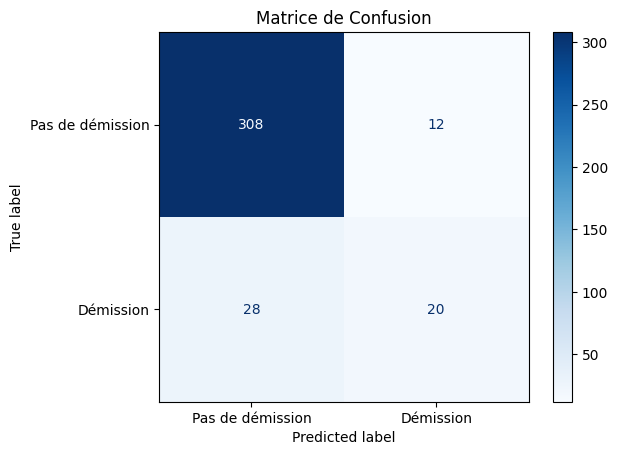


=== Interprétation de la Matrice de Confusion ===
Vrais Négatifs (TN): 308 - Employés qui ne démissionnent pas et correctement prédits
Faux Positifs (FP): 12 - Employés qui NE démissionnent PAS mais prédits comme démissionnaires
Faux Négatifs (FN): 28 - Employés qui démissionnent mais prédits comme restants (⚠️ RISQUE)
Vrais Positifs (TP): 20 - Employés qui démissionnent et correctement prédits

Total de prédictions: 368
Démissions réelles dans le test: 48
Démissions prédites: 32

Précision: 0.625 - Parmi ceux prédits comme démissionnaires, 62.5% le sont vraiment
Recall (Sensibilité): 0.417 - Le modèle détecte 41.7% des démissions réelles
Spécificité: 0.963 - Le modèle identifie 96.2% des non-démissions

=== Rapport de Classification ===
                  precision    recall  f1-score   support

Pas de démission       0.92      0.96      0.94       320
       Démission       0.62      0.42      0.50        48

        accuracy                           0.89       368
       macro avg 

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Cross-validation avec AUC
model = make_pipeline(preprocessor, LogisticRegression())

cv_results = cross_validate(
    model, X_train, y_train, 
    cv=5,
    scoring=['roc_auc', 'accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

print("=== Résultats de la Cross-Validation ===")
print(f"AUC moyen: {cv_results['test_roc_auc'].mean():.3f} (+/- {cv_results['test_roc_auc'].std():.3f})")
print(f"Accuracy moyenne: {cv_results['test_accuracy'].mean():.3f}")
print(f"Precision moyenne: {cv_results['test_precision'].mean():.3f}")
print(f"Recall moyen: {cv_results['test_recall'].mean():.3f}")
print(f"F1-score moyen: {cv_results['test_f1'].mean():.3f}")

# Entraînement final sur tout X_train
model.fit(X_train, y_train)

# Prédictions sur X_test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour calculer l'AUC

# Score AUC sur le test
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n=== Score sur le Test Set ===")
print(f"AUC sur test: {test_auc:.3f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pas de démission', 'Démission'])
disp.plot(cmap='Blues')
plt.title('Matrice de Confusion')
plt.show()

# Fonction pour lire la matrice de confusion
def interpreter_matrice_confusion(y_true, y_pred):
    """
    Interprète la matrice de confusion pour un problème de démission
    """
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("\n=== Interprétation de la Matrice de Confusion ===")
    print(f"Vrais Négatifs (TN): {tn} - Employés qui ne démissionnent pas et correctement prédits")
    print(f"Faux Positifs (FP): {fp} - Employés qui NE démissionnent PAS mais prédits comme démissionnaires")
    print(f"Faux Négatifs (FN): {fn} - Employés qui démissionnent mais prédits comme restants (⚠️ RISQUE)")
    print(f"Vrais Positifs (TP): {tp} - Employés qui démissionnent et correctement prédits")
    
    print(f"\nTotal de prédictions: {tn + fp + fn + tp}")
    print(f"Démissions réelles dans le test: {tp + fn}")
    print(f"Démissions prédites: {tp + fp}")
    
    # Métriques dérivées
    if (tp + fp) > 0:
        precision = tp / (tp + fp)
        print(f"\nPrécision: {precision:.3f} - Parmi ceux prédits comme démissionnaires, {precision*100:.1f}% le sont vraiment")
    
    if (tp + fn) > 0:
        recall = tp / (tp + fn)
        print(f"Recall (Sensibilité): {recall:.3f} - Le modèle détecte {recall*100:.1f}% des démissions réelles")
    
    if (tn + fp) > 0:
        specificity = tn / (tn + fp)
        print(f"Spécificité: {specificity:.3f} - Le modèle identifie {specificity*100:.1f}% des non-démissions")

# Utiliser la fonction
interpreter_matrice_confusion(y_test, y_pred)

# Rapport de classification complet
print("\n=== Rapport de Classification ===")
print(classification_report(y_test, y_pred, target_names=['Pas de démission', 'Démission']))